<a href="https://colab.research.google.com/github/Akshithvodnala18/STML/blob/main/stmlproject(AIR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


        Date    Country                          Status  AQI Value  Day  \
0 2022-07-21    Albania                            Good         14   21   
1 2022-07-21    Algeria                        Moderate         65   21   
2 2022-07-21    Andorra                        Moderate         55   21   
3 2022-07-21     Angola  Unhealthy for Sensitive Groups        113   21   
4 2022-07-21  Argentina                        Moderate         63   21   

   Month  Year  
0      7  2022  
1      7  2022  
2      7  2022  
3      7  2022  
4      7  2022  
Mean Squared Error: 2327.74
Root Mean Squared Error: 48.24665560295581
Mean Absolute Error: 34.229325968401575
Predicted AQI: 64.63


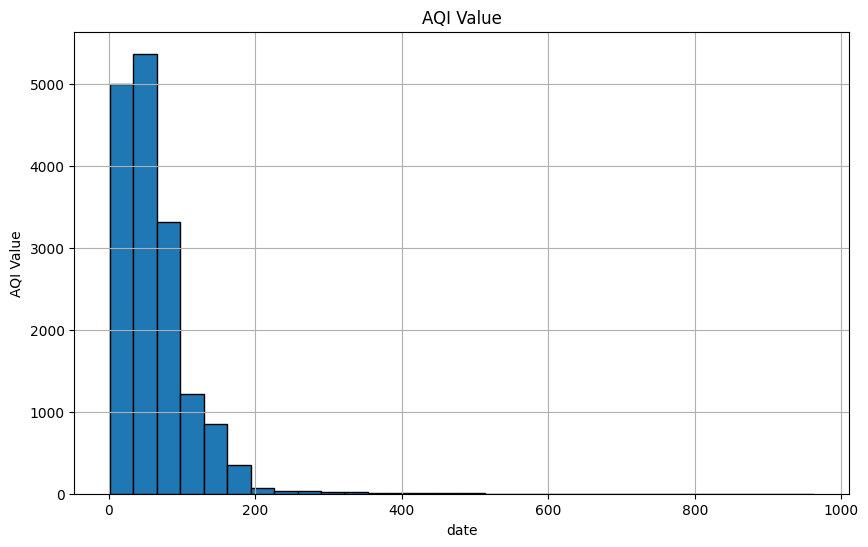

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data_date.csv')

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Define the feature matrix (X) and target variable (y)
X = df[['Day', 'Month', 'Year']]
y = df['AQI Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print(df.head())

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Use the model to make predictions on new data
new_data = pd.DataFrame({'Day': [15], 'Month': [6], 'Year': [2023]})
new_prediction = model.predict(new_data)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


print(f'Predicted AQI: {new_prediction[0]:.2f}')


import matplotlib.pyplot as plt
# Assuming the dataset has a column 'Anomaly' for temperature anomalies
anomalies = df['AQI Value']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(anomalies, bins=30, edgecolor='black')
plt.title('AQI Value')
plt.xlabel('date')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()


Mean Squared Error: 2324.40
Predicted AQI: 62.43
Root Mean Squared Error: 48.21206814732552
Mean Absolute Error: 34.21610034919747


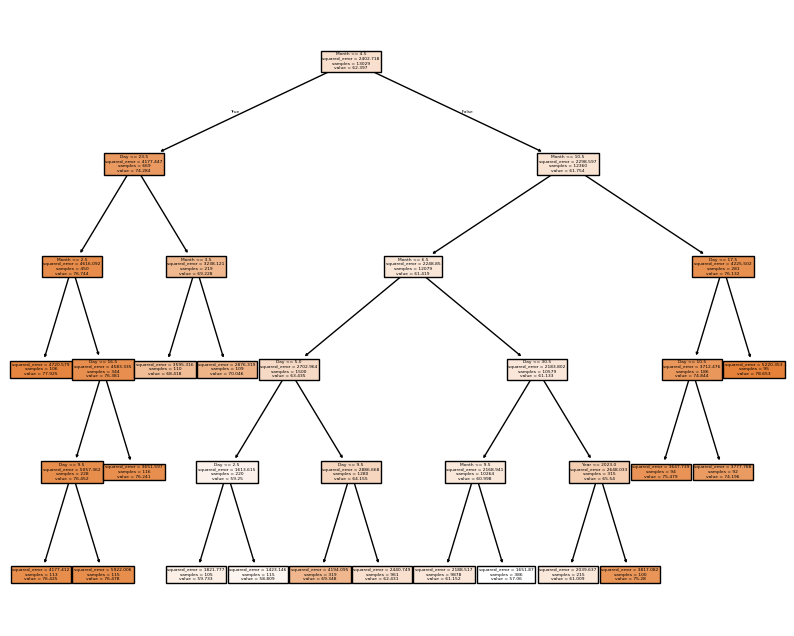

In [5]:

from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Use the model to make predictions on new data
new_data = pd.DataFrame({'Day': [15], 'Month': [6], 'Year': [2023]})
new_prediction = model.predict(new_data)
print(f'Predicted AQI: {new_prediction[0]:.2f}')

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

import matplotlib.pyplot as plt
from sklearn import tree
# Plot decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

Mean Absolute Error: 34.3705201924422
Mean Squared Error: 2339.445172909999
Root Mean Squared Error: 48.367811330573964
Feature Importances:
Day: 0.4603113792352746
Month: 0.4453170152517834
Year: 0.09437160551294198


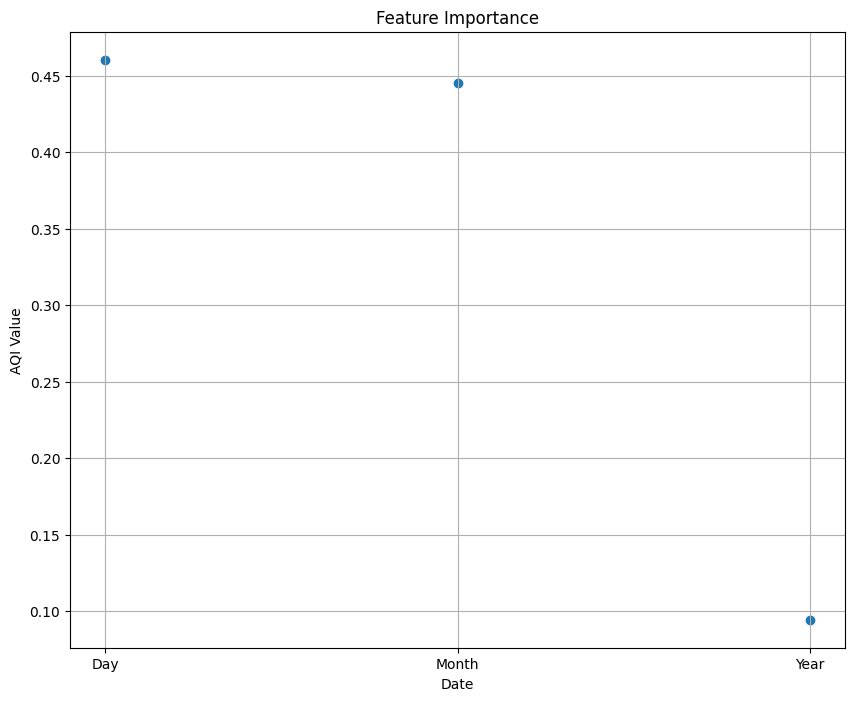

In [6]:


from sklearn.ensemble import RandomForestRegressor

# Create random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train random forest regressor
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Feature importance
feature_importances = rf.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.scatter(X.columns,feature_importances)
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

In [7]:
from sklearn import svm
# Create SVM regressor
svm_regressor = svm.SVR(kernel='rbf', C=1, gamma=0.1)

# Train SVM regressor
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test)

# Evaluate mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 32.88297619962698
Mean Squared Error: 2381.2803285437344
Root Mean Squared Error: 48.79836399454119


Mean Absolute Error: 36.99201964395335
Mean Squared Error: 2688.2436832412527
Root Mean Squared Error: 51.848275605281735
R^2 Score: -0.15396655302414453


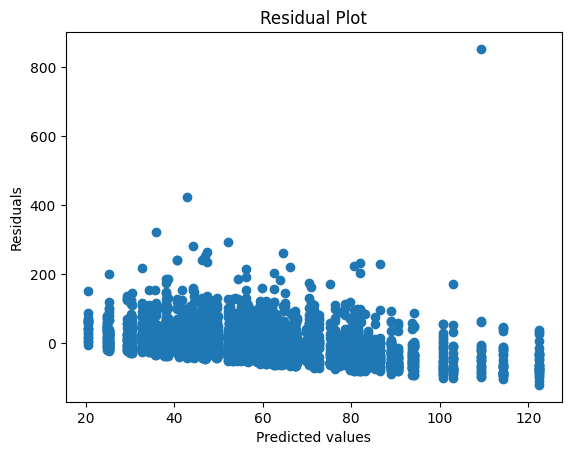

In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


# Create a KNN regressor model
knn = KNeighborsRegressor(n_neighbors=5)  # You can change the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()